### Loading and cleaning the data in both files 

In [2]:
import pandas as pd
trades_df = pd.read_csv(r"C:\Users\ailsn\Downloads\historical_data.csv")
sentiment_df = pd.read_csv(r"C:\Users\ailsn\Downloads\fear_greed_index.csv")


In [6]:
print(trades_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [7]:
print(sentiment_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [23]:
# Convert Closed PnL to numeric
trades_df['Closed PnL'] = pd.to_numeric(trades_df['Closed PnL'], errors='coerce')

# Now describing it 
print(trades_df['Closed PnL'].describe())

count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: Closed PnL, dtype: float64


 ### Merge the Datasets on Date

In [31]:
# Step 1: Merge trader and sentiment data on date
trades_df['date'] = pd.to_datetime(trades_df['date'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Merge on date
merged_df = pd.merge(trades_df, sentiment_df, on='date', how='left')

# Show the first few rows
print(merged_df[['date', 'classification', 'Closed PnL']].head())


        date classification  Closed PnL
0 2024-12-02  Extreme Greed         0.0
1 2024-12-02  Extreme Greed         0.0
2 2024-12-02  Extreme Greed         0.0
3 2024-12-02  Extreme Greed         0.0
4 2024-12-02  Extreme Greed         0.0


### Drop missing and all-zero Closed PnL rows

In [32]:
# Check how many rows have Closed PnL as 0 or NaN
print("Total rows:", merged_df.shape[0])
print("Zero Closed PnL rows:", (merged_df['Closed PnL'] == 0).sum())
print("NaN Closed PnL rows:", merged_df['Closed PnL'].isna().sum())

# Drop rows where Closed PnL is 0 or NaN
cleaned_df = merged_df[(merged_df['Closed PnL'] != 0) & (~merged_df['Closed PnL'].isna())]

# Show result
print("Remaining rows after cleaning:", cleaned_df.shape[0])
print(cleaned_df[['date', 'classification', 'Closed PnL']].head())


Total rows: 211224
Zero Closed PnL rows: 106816
NaN Closed PnL rows: 0
Remaining rows after cleaning: 104408
         date classification   Closed PnL
44 2024-12-03  Extreme Greed  3008.231185
45 2024-12-03  Extreme Greed    30.741534
46 2024-12-03  Extreme Greed    40.770089
47 2024-12-03  Extreme Greed   243.812267
48 2024-12-03  Extreme Greed   254.263735


### Group and analyze performance by sentiment type

In [33]:
# Group by sentiment classification and calculate stats
sentiment_analysis = cleaned_df.groupby('classification')['Closed PnL'].agg(['count', 'mean', 'median', 'std', 'min', 'max']).reset_index()

# Sort by average profit
sentiment_analysis = sentiment_analysis.sort_values(by='mean', ascending=False)

# Show the result
print(sentiment_analysis)

  classification  count        mean    median          std           min  \
1  Extreme Greed  20853  130.205309  8.530740  1058.126139  -10259.46800   
2           Fear  29808  112.625988  6.350483  1344.778427  -35681.74723   
3          Greed  25176   85.403927  4.927600  1576.394764 -117990.10410   
4        Neutral  18159   71.199993  4.583458   743.212863  -24500.00000   
0   Extreme Fear  10406   71.027316  6.388050  1628.408341  -31036.69194   

            max  
1   44223.45187  
2  135329.09010  
3   74530.52371  
4   48504.09555  
0  115287.00000  


In [43]:
import pandas as pd

summary_df = cleaned_df.groupby('classification')['Closed PnL'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
).reset_index()


Traders tend to perform best in Extreme Greed and Fear conditions on average, though the risk is higher.

## Visualize sentiment-wise performance

### Average Closed PnL by Market Sentiment

In [38]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\ailsn\AppData\Local\Temp\ipykernel_7256\4099772390.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x='classification', y='mean', order=order, palette='coolwarm')


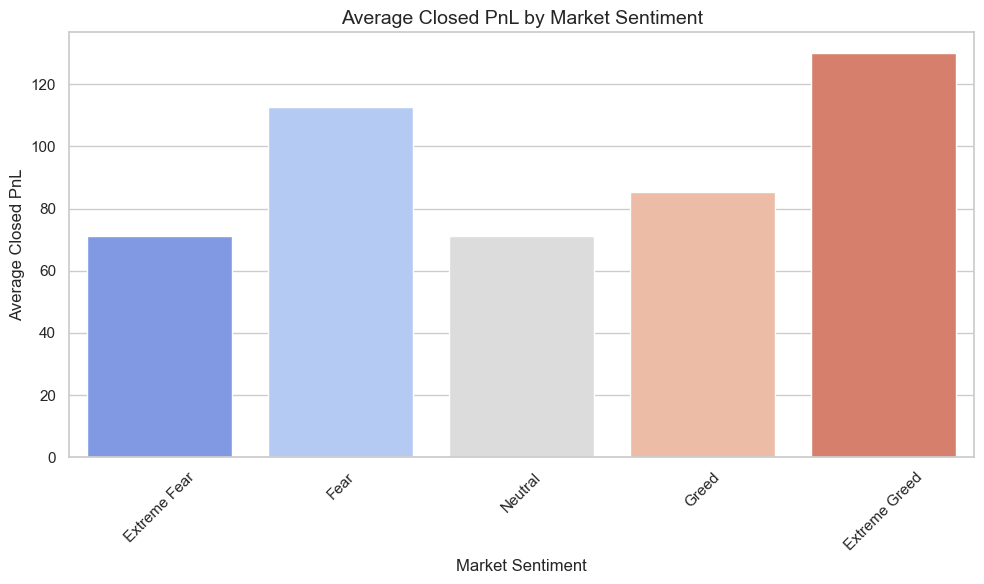

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set a clean style
sns.set(style="whitegrid")

order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='classification', y='mean', order=order, palette='coolwarm')

plt.title('Average Closed PnL by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Boxplot – PnL Distribution by Sentiment

C:\Users\ailsn\AppData\Local\Temp\ipykernel_7256\1878421291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='classification', y='Closed PnL', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'], palette='coolwarm')


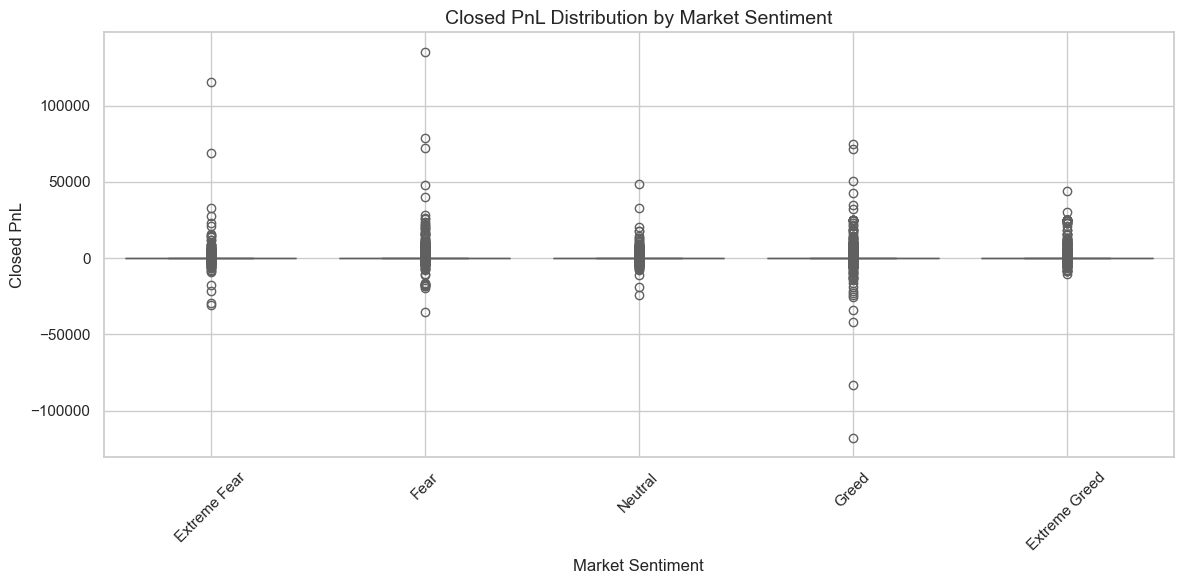

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='classification', y='Closed PnL', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'], palette='coolwarm')
plt.title('Closed PnL Distribution by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Trend Over Time – Average PnL by Date

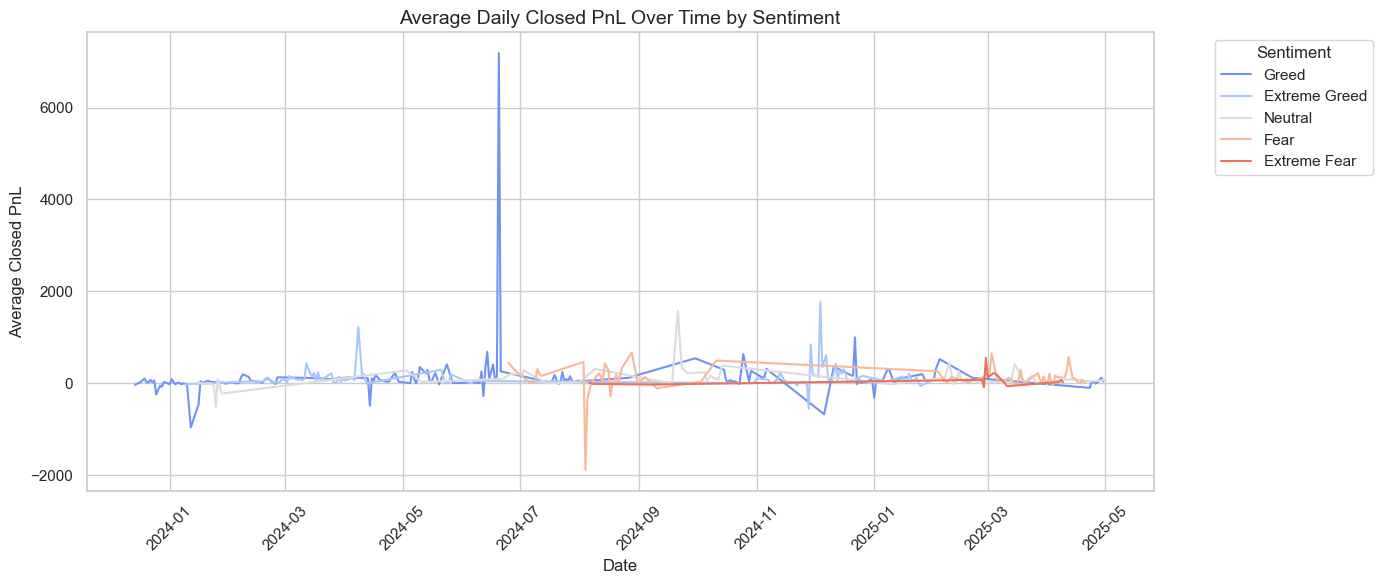

In [48]:
trend_df = cleaned_df.groupby(['date', 'classification'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_df, x='date', y='Closed PnL', hue='classification', palette='coolwarm')
plt.title('Average Daily Closed PnL Over Time by Sentiment', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


## Volume of Trades per Sentiment Over Time

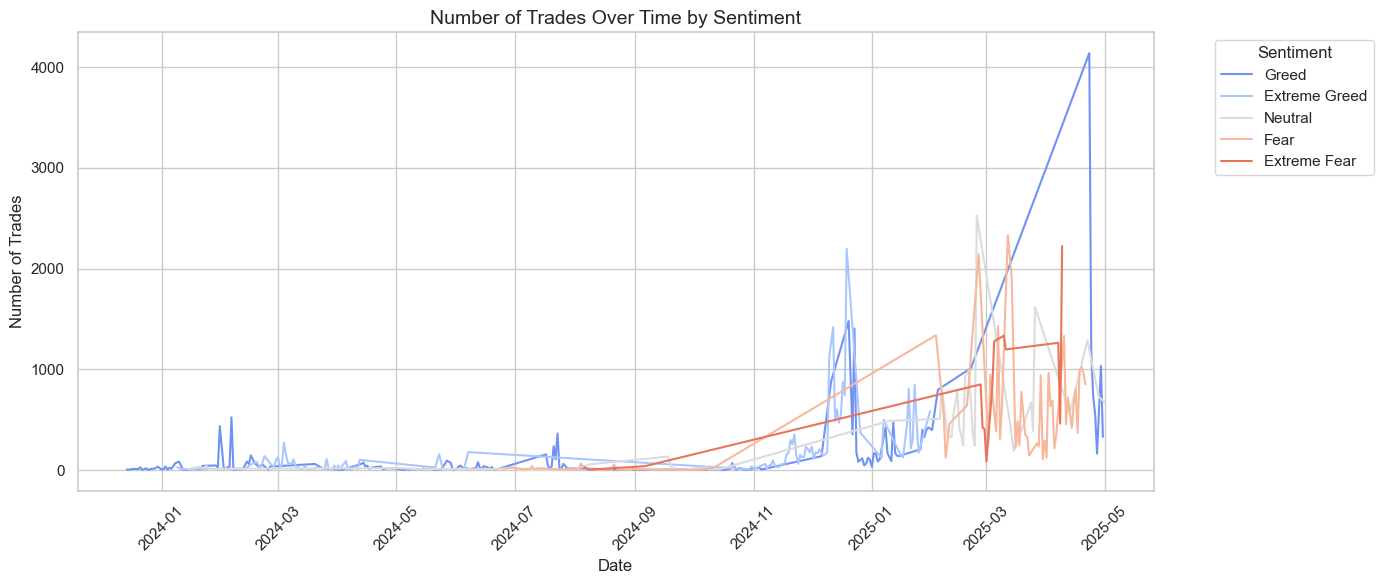

In [50]:
volume_df = cleaned_df.groupby(['date', 'classification']).size().reset_index(name='trade_count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=volume_df, x='date', y='trade_count', hue='classification', palette='coolwarm')
plt.title('Number of Trades Over Time by Sentiment', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


## Outlier Trades per Sentiment

C:\Users\ailsn\AppData\Local\Temp\ipykernel_7256\411002899.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_df, x='classification', y='Closed PnL', order=order, palette='coolwarm', showfliers=True)


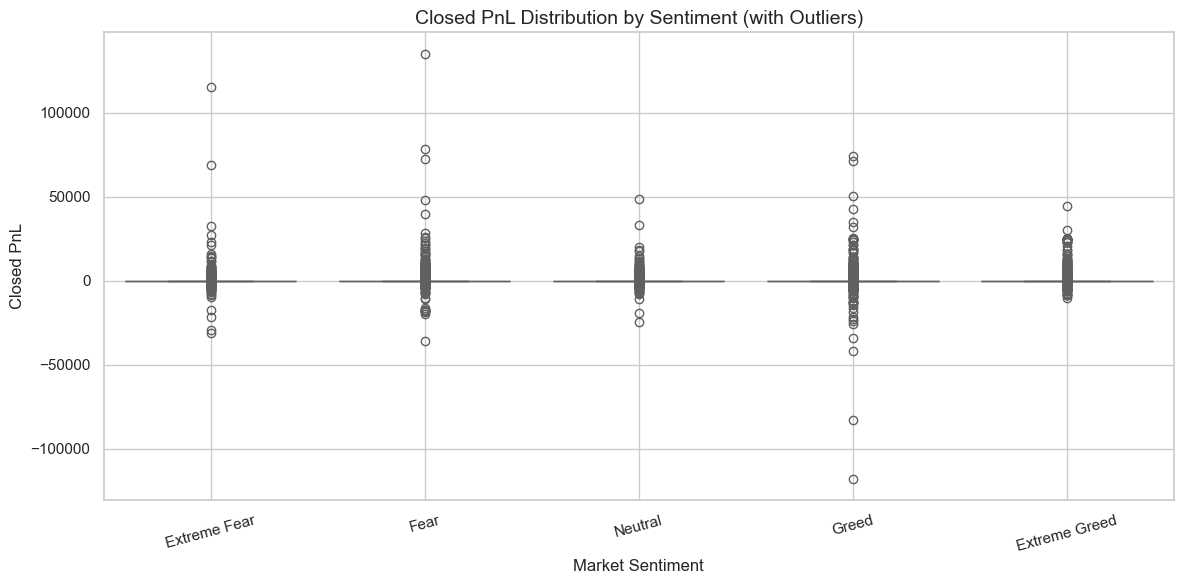

In [52]:
plt.figure(figsize=(12, 6))
order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

sns.boxplot(data=cleaned_df, x='classification', y='Closed PnL', order=order, palette='coolwarm', showfliers=True)
plt.title('Closed PnL Distribution by Sentiment (with Outliers)', fontsize=14)
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()


### Correlation Between Sentiment and PnL

In [56]:
# Define ordinal encoding for classification
sentiment_order = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}

# Map to new column
cleaned_df['sentiment_score'] = cleaned_df['classification'].map(sentiment_order)

# Computing correlation
correlation = cleaned_df[['sentiment_score', 'Closed PnL']].corr()
print(correlation)


                 sentiment_score  Closed PnL
sentiment_score         1.000000    0.006467
Closed PnL              0.006467    1.000000


C:\Users\ailsn\AppData\Local\Temp\ipykernel_7256\2682742732.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sentiment_score'] = cleaned_df['classification'].map(sentiment_order)


# Interpretation

sentiment_score vs Closed PnL: 0.0064
This is a very weak positive correlation , essentially close to zero which means there’s no strong linear relationship between market sentiment and average Closed PnL. Just because sentiment changes from Fear to Greed doesn’t guarantee profit increases or decreases linearly.

 #### Project Insight Summary

We analyzed the relationship between market sentiment classifications (Extreme Fear to Extreme Greed) and trading performance (Closed PnL). Summary statistics, visualizations, and correlation analysis revealed that while extreme sentiments (both fear and greed) are associated with larger fluctuations in PnL, the overall correlation between sentiment score and Closed PnL is weak (r ≈ 0.006). This suggests that while sentiment may reflect market mood, it doesn't directly predict profitability linearly. Traders may need to incorporate additional technical or fundamental signals alongside sentiment to make more informed decisions.